In [10]:
import matplotlib.pylab as plt
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
                
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [28]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0:] += self.eta * errors.sum()
            cost = (errors ** 2).sum() * 0.5
            self.cost_.append(cost)
            # print(self.w_)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [36]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        for xi, target in zip(X, y):
            self._update_weights(xi, target)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
        
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
            
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
        
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


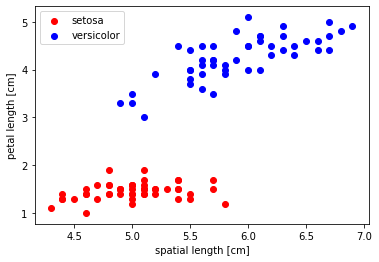

In [6]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# print(type(df.iloc[0:100, 4]))
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[51:, 0], X[51:, 1], color='blue', marker='o', label='versicolor')
plt.xlabel("spatial length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc='upper left')
plt.show()

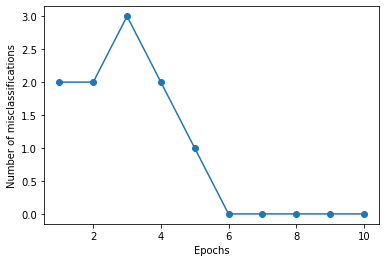

[-4.  -6.8 18.2]


In [12]:
ppn = Perceptron(eta = 1.0, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

[-4.  -6.8 18.2]


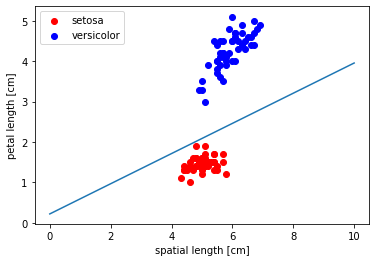

In [16]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[51:, 0], X[51:, 1], color='blue', marker='o', label='versicolor')
plt.xlabel("spatial length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc='upper left')

x = np.linspace(0, 10, 1000)
print(ppn.w_)
plt.plot(x, - (ppn.w_[0] + ppn.w_[1] * x) / ppn.w_[2])

plt.show()

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers= ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

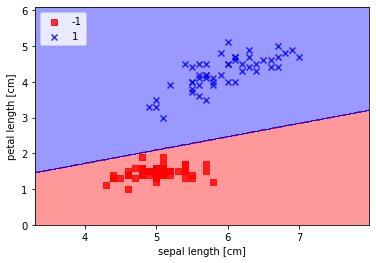

In [21]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc='upper left')
plt.show()

[0.    0.465 1.398]
[ -6.545091  -42.6579873 -25.7329182]
[ 307.02946041 2023.57572548 1272.03745734]
[-14711.553997   -96937.11434313 -60883.62966463]
[ 704591.90067146 4642709.77268249 2916014.67645926]
[-3.37458992e+07 -2.22359067e+08 -1.39660262e+08]
[1.61623412e+09 1.06497181e+10 6.68892186e+09]
[-7.74083019e+10 -5.10060132e+11 -3.20360816e+11]
[3.70741164e+12 2.44289414e+13 1.53434372e+13]
[-1.77563656e+14 -1.17000554e+15 -7.34862234e+14]
[0.      0.00465 0.01398]
[-0.00065451  0.0049412   0.02510711]
[-0.00163686  0.00302655  0.03473475]
[-2.78018509e-03  6.09411782e-06  4.35550522e-02]
[-0.00399926 -0.0035582   0.05192214]
[-0.00525061 -0.00737935  0.06001742]
[-0.00651208 -0.01131091  0.06793402]
[-0.00777241 -0.01527828  0.07571995]
[-0.00902592 -0.01924351  0.08340016]
[-0.01026976 -0.02318746  0.09098779]


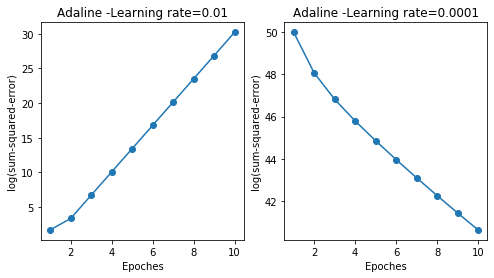

[-1.77563656e+14 -1.17000554e+15 -7.34862234e+14]
[50.0, 2230.853960255, 5110016.372012527, 11721588731.952084, 26887663083775.984, 6.167648207204373e+16, 1.4147709440178579e+20, 3.245283707356312e+23, 7.444220130314189e+26, 1.7075984211475186e+30]
[-0.01026976 -0.02318746  0.09098779]
[50.0, 48.06916268602549, 46.81801671106223, 45.79030274671852, 44.85085635660735, 43.95614412440282, 43.090496747175855, 42.24751418841222, 41.42422759281343, 40.61907796882277]


In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epoches')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline -Learning rate=0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epoches')
ax[1].set_ylabel('log(sum-squared-error)')
ax[1].set_title('Adaline -Learning rate=0.0001')

plt.show()

print(ada1.w_)
print(ada1.cost_)
print(ada2.w_)
print(ada2.cost_)

In [32]:
X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

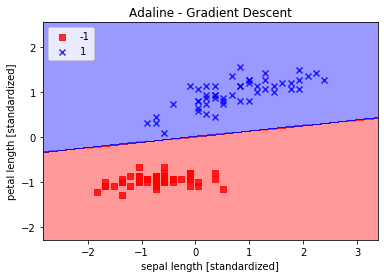

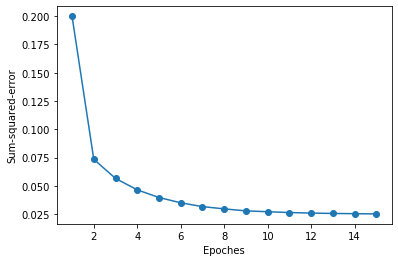

In [37]:
# ada = AdalineGD(n_iter=15, eta=0.01)
ada = AdalineSGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Sum-squared-error')
plt.show()